<a href="https://colab.research.google.com/github/Jejes-Rosy/C2.23-B-02/blob/main/Spectral_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install dan import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer


In [2]:
# Baca data
df = pd.read_csv("CC GENERAL.csv")

# Drop kolom ID
df.drop('CUST_ID', axis=1, inplace=True)


In [3]:
# Tangani missing value (isi dengan median)
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Standarisasi data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_imputed)

# Terapkan Spectral Clustering
sc = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
labels = sc.fit_predict(scaled_data)

# Tambahkan hasil cluster ke data
df_imputed['Cluster'] = labels

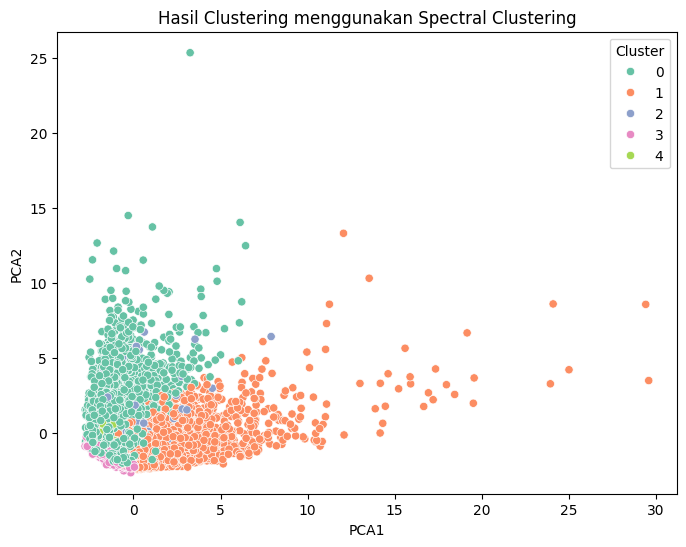

Silhouette Score: 0.0222


In [4]:
# Visualisasi hasil clustering (PCA 2D)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)
df_imputed['PCA1'] = pca_result[:, 0]
df_imputed['PCA2'] = pca_result[:, 1]

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_imputed, x='PCA1', y='PCA2', hue='Cluster', palette='Set2')
plt.title("Hasil Clustering menggunakan Spectral Clustering")
plt.show()

# Evaluasi dengan silhouette score
score = silhouette_score(scaled_data, labels)
print(f"Silhouette Score: {score:.4f}")